In [9]:
import scipy.io
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from scipy import signal

In [10]:
x = scipy.io.loadmat(r"C:\Users\Venkatesh Yeturi\Downloads\givenECG3.mat")
x

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017',
 '__version__': '1.0',
 '__globals__': [],
 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

In [11]:
ind = [i for i in range(3600)]

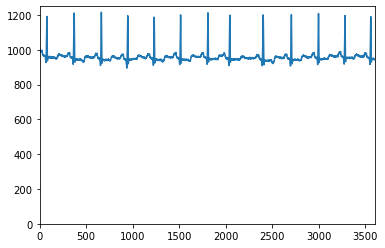

In [12]:
plt.axis([0, 3600, 0, 1250])
plt.plot(x['givenECG3'][0]);

In [13]:
sig = x['givenECG3'][0]
ind = scipy.signal.find_peaks(x['givenECG3'][0],height=1150)[0]

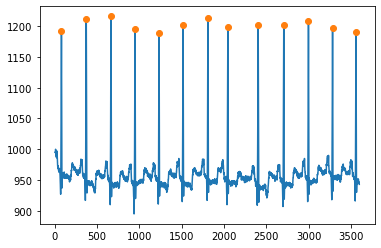

In [14]:
plt.plot(sig)
plt.plot(ind, sig[ind], 'o')

In [15]:
ind.shape

(13,)

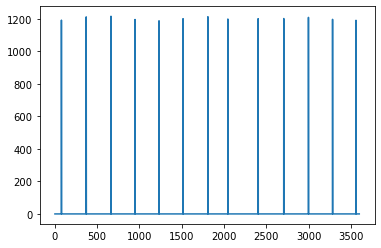

In [16]:
unit = np.zeros(len(sig))
unit[ind] = 1
plt.plot(sig*unit)


In [17]:
time = np.linspace(0, 10,  3600)
time.shape

(3600,)

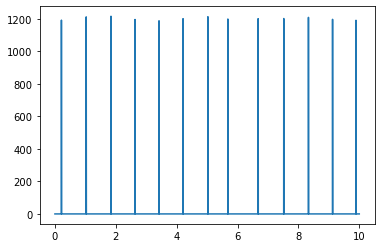

In [18]:
plt.plot(time, sig*unit)
# plt.grid()

In [19]:
sum = 0
for i in range(len(ind)-1):
    sum += ind[i+1] - ind[i]
sum /= (len(ind)-1)

print('R-R interval is : ',(sum)*10/3600 , 'sec') 

R-R interval is :  0.80625 sec


In [186]:
rr_intervals = np.zeros(len(ind)-1)
r_peaks = sig[ind]
print(r_peaks)
# for i in range(len(ind)-1):
#     rr_intervals.append(r_peaks[i+1]-r_peaks[i])
# rr_intervals

[1192 1212 1216 1196 1188 1201 1213 1199 1201 1202 1209 1197 1191]


In [189]:

for i in range(len(ind)-1):
    rr_intervals[i]=(ind[i+1]-ind[i])*10/3600
    
rr_intervals

array([0.81388889, 0.81388889, 0.78888889, 0.78888889, 0.78888889,
       0.81666667, 0.65555556, 0.99444444, 0.84166667, 0.81111111,
       0.79166667, 0.76944444])

<StemContainer object of 3 artists>

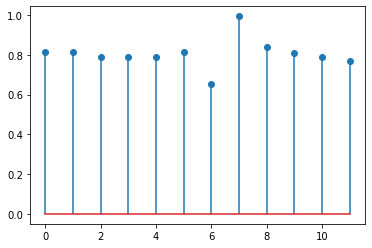

In [190]:
plt.stem(rr_intervals)

In [191]:
heart_rate_mean = rr_intervals.mean()
heart_rate_mean

0.8062499999999999

In [194]:
heart_rate_std = rr_intervals.std()
heart_rate_std

0.07193787507544529

# 2nd question

In [197]:
y = scipy.io.loadmat(r"C:\Users\Venkatesh Yeturi\Downloads\inputECG.mat")
y

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 25 12:30:29 2017',
 '__version__': '1.0',
 '__globals__': [],
 'inputECG': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

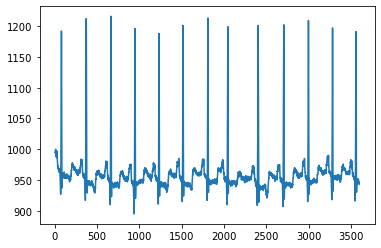

In [198]:
plt.plot(y['inputECG'][0])

In [231]:
def TSA(signal, N):
    copies_matrix = np.array([signal2 for i in range(N)])
    noise_matrix = np.random.randn(copies_matrix.shape[0],copies_matrix.shape[1])

    TSA_matrix = copies_matrix + noise_matrix

    Avg_row = np.mean(TSA_matrix, axis = 0)

    prd = np.sqrt((np.sum(np.square(Avg_row - signal2))/np.sum(np.square(signal2))))
    return prd


0.005425065762534436

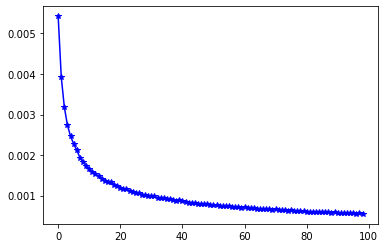

In [234]:
signal2 = y['inputECG'][0]
PRDs = []
for N in range(1, 100):
    PRDs.append(TSA(signal2, N))
plt.plot(PRDs, 'b*-')
PRDs[0]

# Question 3

In [26]:
signal3 = scipy.io.loadmat(r"C:\Users\Venkatesh Yeturi\Downloads\givenECG3.mat")
signal3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017',
 '__version__': '1.0',
 '__globals__': [],
 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

In [27]:
signal3 = signal3['givenECG3'][0]
signal3

array([995, 995, 995, ..., 946, 944, 943], dtype=uint16)

In [165]:
signal3_mean = signal3.mean()
signal3_mean

960.0155555555556

In [28]:
indices_of_noise = np.linspace(0,10,3600)
indices_of_noise[:5]

array([0.        , 0.00277855, 0.0055571 , 0.00833565, 0.0111142 ])

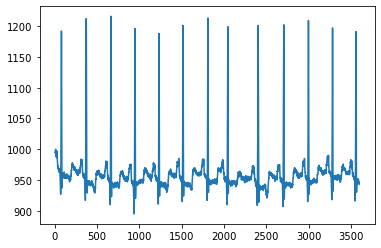

In [29]:
plt.plot(signal3)

In [97]:
sign_with_wander_noise = signal3 + [50*np.sin(2*3.14*0.5*i) for i in indices_of_noise]


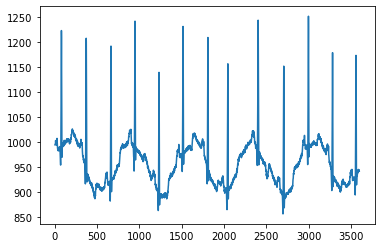

In [98]:
plt.plot(sign_with_wander_noise)

In [138]:
num, den = signal.butter(5, 1, btype='high', analog=False, output='ba', fs=360)
num

array([ 0.97215457, -4.86077285,  9.72154571, -9.72154571,  4.86077285,
       -0.97215457])

In [139]:
den

array([ 1.        , -4.94352017,  9.77567237, -9.66586846,  4.77880076,
       -0.94508451])

In [140]:
zi = signal.lfilter_zi(num, den)
z, _ = signal.lfilter(num, den, sign_with_wander_noise, zi=zi*sign_with_wander_noise[0])

In [141]:
z2, _ = signal.lfilter(num, den, z, zi=zi*z[0])


In [142]:
y = signal.filtfilt(num,den,sign_with_wander_noise)


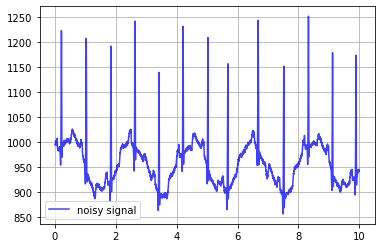

In [143]:
plt.figure
plt.plot(indices_of_noise, sign_with_wander_noise, 'b', alpha=0.75)
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

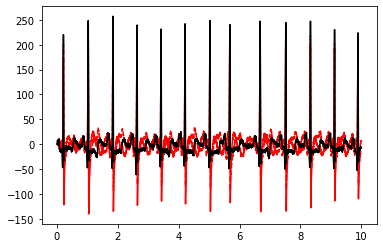

In [144]:
plt.plot(indices_of_noise, z, 'r--', indices_of_noise, z2, 'r', indices_of_noise, y, 'k')

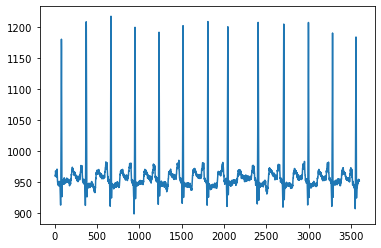

In [174]:
wander_signal_after_filtering = y+signal3_mean
plt.plot(wander_signal_after_filtering)

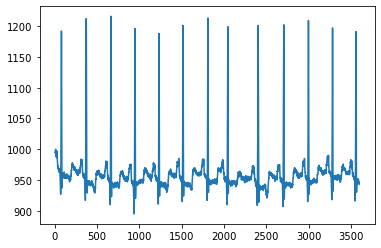

In [175]:
plt.plot(signal3)

In [176]:
prd_wander = np.sqrt(np.sum(np.square(wander_signal_after_filtering-signal3))/len(signal3))
prd_wander

5.6172025321113015

In [177]:
signal_with_powerline_noise = signal3+[50*np.sin(2*3.14*50*i) for i in indices_of_noise]

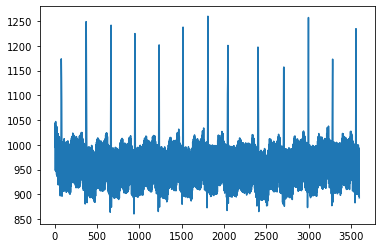

In [178]:
plt.plot(signal_with_powerline_noise)

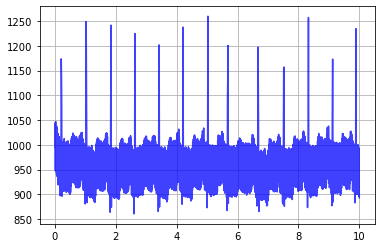

In [159]:
num2, den2 = signal.iirnotch(50, 5, fs=360)
zi_power = signal.lfilter_zi(num2, den2)
z_power, _ = signal.lfilter(num2, den2, signal_with_powerline_noise, zi =zi_power*signal_with_powerline_noise[0])
z2_power, _ = signal.lfilter(num2, den2, z_power, zi=zi_power*z_power[0])
plt.figure
plt.plot(indices_of_noise, signal_with_powerline_noise, 'b', alpha=0.75)
# plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
#             'filtfilt'), loc='best')
plt.grid(True)
plt.show()

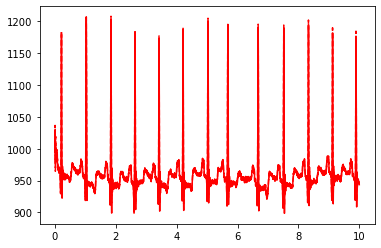

In [160]:
plt.plot(indices_of_noise, z_power, 'r--', indices_of_noise, z2_power, 'r')

In [163]:
err = z2_power - signal3
prd = np.sqrt(np.sum(np.square(err))/len(signal3))
prd

7.572126903830794